<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as nx_comm

In [2]:
G = nx.read_gml('synthetic_mm.gml')

In [11]:
G.number_of_nodes()

150

In [12]:
G.number_of_edges()

263

In [13]:
list(G.nodes)

['4cabfc8e-fd5d-3e3d-94f6-49f3eb39ed7f',
 '7bf69433-1dab-3543-b96d-e224379f5cfa',
 '15928ce5-2b09-316e-9162-5ec0a4b52f12',
 '12f56b23-d6e9-3c15-8a51-92a478f4523e',
 '49205104-164f-3873-af5e-d8151688ae31',
 '6b7ae965-1a4f-3fc9-89a2-31758087e9dc',
 '368ca0c7-befc-33bf-8855-32351323b909',
 '0da0851d-237c-35ea-87a9-aa41582d9d93',
 '8cf65b2a-d9ea-3ae6-be2e-fd78dea130bc',
 'ba003c38-1144-3e28-9b79-14ce166a594e',
 'b0339708-18f0-3402-9e4c-dd99a8e7309d',
 '2f5f1f04-f9eb-39fd-8246-ed3e4f7fe58b',
 '8aaba1d5-a00a-3234-9646-4f0feb44a4df',
 'c52eac7a-c60e-3d25-8cf9-2e996e9d6d72',
 'e04ed23d-643c-3dfe-8959-3e330600ad4d',
 '8877df45-b2fd-3aeb-834b-c12446004f41',
 '74dfd360-f3cb-370d-9e82-868be29a3ea1',
 '1913cc82-5a7f-3b7e-882e-d1ec644b613a',
 '6a695759-9660-3e00-90f3-9132618ae530',
 'ee2f7175-a5df-349f-845a-c783638e6fd0',
 'baf247ed-d207-39ee-83cc-7ad8d5c3cf8a',
 '7a8a5756-e00c-337a-b18e-c298ea460283',
 '8ff20366-c764-33af-88ca-9c8141d7eac8',
 'ef23eece-8a66-30be-b1ce-79d45fe9eac0',
 '11467f1b-32e0-

In [3]:
list(G.neighbors('cf774c62-c401-3eba-af07-758e5431196a'))

['df9d0887-346b-380f-a3c6-8766f81199eb',
 '588e6d98-1c6c-38b0-acec-dfa61302d06f',
 '4a272602-9fa2-3a51-981d-017da99f2e0f',
 '061da31f-0a25-3ed3-bc75-32835f075468',
 '798a323f-d13f-38d6-9200-936083035188',
 '772bc035-47ca-3105-b638-e91b509f3fb5',
 '54043e0b-4215-38c1-9181-493584dd4495',
 '73c39209-7878-3774-9954-8b3dccc1b1a7',
 'a6802ed8-70c8-331d-b219-15877cd19814',
 'bffbe4fd-d212-3bee-baf5-5458d912c086',
 'aa847d53-276c-357f-8ec1-96b8e3aecd86',
 'ea2db2e8-fd87-34d3-b2f6-d9545a316af4']

In [6]:
val_map = {'cryptocurrency_address': 0,
'cryptocurrency_cluster':.10,
'location':.20,
'ip_address':.3,
'osints':.4,
'party':.5,
'address':.6,
'electronic_address':.7,
'identification':.8,
'name':.9,
'phone_number':1
# 'account':,
# 'activity':,
# 'cargo':,
# 'vessel':,
}

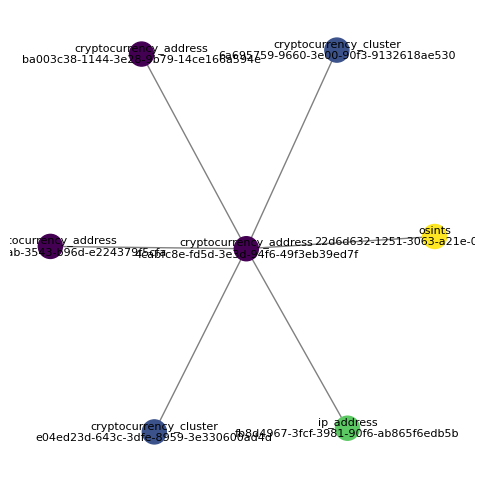

In [10]:
subgraph = nx.ego_graph(G, '4cabfc8e-fd5d-3e3d-94f6-49f3eb39ed7f', radius=1)
color_map = [val_map.get(attributes['table'], 0.25) for node, attributes in subgraph.nodes(data=True)]

#dictionary with nodes as keys and table as the value
node_table_labels = {node: attributes['table'] + '\n' + attributes['guid']
                     for node, attributes in subgraph.nodes(data=True)}

pos = nx.spring_layout(subgraph, k=0.15, iterations=20, seed=42)
fig, ax = plt.subplots(figsize=(6, 6))
nx.draw(subgraph, pos=pos, ax=ax, with_labels=True, labels = node_table_labels, font_size=8, cmap=plt.get_cmap('viridis'),
        node_color=color_map, edge_color='gray')

In [55]:
G.nodes['09e93e56-86f6-3685-bab5-aa69e386d23f']

{'address': 'nan',
 'table': 'party',
 'asset': 'nan',
 'root_address': 'nan',
 'raw_source': 'gt',
 'category': 'nan',
 'deposits': 'nan',
 'fees': 'nan',
 'fees_usd': 'nan',
 'first_activity': 'nan',
 'last_activity': 'nan',
 'name': 'nan',
 'received': 'nan',
 'received_usd': 'nan',
 'sent': 'nan',
 'sent_usd': 'nan',
 'withdrawals': 'nan',
 'city': 'nan',
 'country': 'nan',
 'latitude': 'nan',
 'longitude': 'nan',
 'geo_coordinates': 'nan',
 'ip_address': 'nan',
 'anonymous': 'nan',
 'isp': 'nan',
 'text': 'nan',
 'url': 'nan',
 'party_type': 'AGENT',
 'citizenship': 'Iceland',
 'nationality': 'Ukraine',
 'gender': 'M',
 'date_of_birth': '1990-06-24 23:50:14',
 'address_type': 'nan',
 'full_address': 'nan',
 'party_address_type': 'nan',
 'state': 'nan',
 'street_address1': 'nan',
 'stree_address2': 'nan',
 'zip_code': 'nan',
 'electronic_address': 'nan',
 'electronic_address_type': 'nan',
 'issuer_country_id': 'nan',
 'issuer_state_id': 'nan',
 'other_issuer_country': 'nan',
 'othe

In [53]:
character_name = '09e93e56-86f6-3685-bab5-aa69e386d23f'

In [54]:
sorted(G[character_name], key=lambda x: G.degree(x), reverse=True)[:10]

['50c6c12f-810e-3700-baef-55c1894d4cb5',
 'b8c56aee-1123-3ece-a683-942aece2728e',
 '48aa8e3e-dc0c-36f8-9d7a-7546ba7cb4d2',
 '588e6d98-1c6c-38b0-acec-dfa61302d06f',
 'c149059d-17df-3f77-89e6-60d5143bca55',
 'bffbe4fd-d212-3bee-baf5-5458d912c086',
 'aa847d53-276c-357f-8ec1-96b8e3aecd86',
 '1e070820-7daa-3235-9ea9-3deb82856b40',
 '436cfbe7-d2ec-3c5b-b0cc-e4ae89a8f89e',
 '1509d9eb-54f7-381c-85c9-613037e2af79']

In [46]:
connected_characters=sorted(G[character_name], key=lambda x: G.degree(x), reverse=True)[:5]
[G.nodes[c]['name'] for c in connected_characters if G.nodes[c]['name']!= 'nan']

['Jennifer Booker']

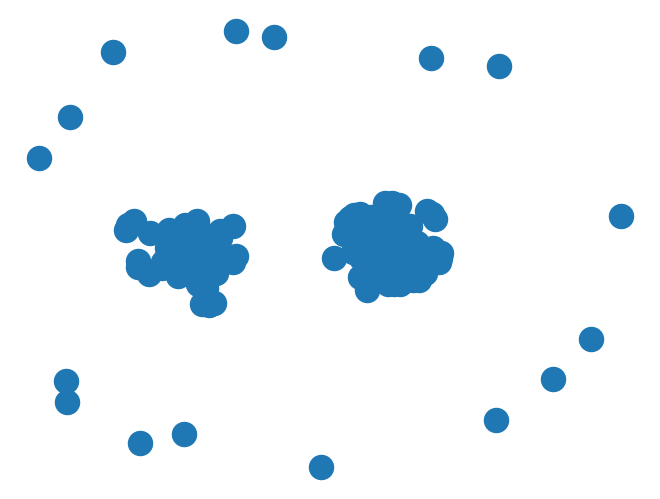

In [19]:
nx.draw(G)

In [52]:
max(dict(G.degree()).items(), key = lambda x : x[1])

('09e93e56-86f6-3685-bab5-aa69e386d23f', 16)

In [47]:
nodesresult = [x for x,y in G.nodes(data=True) if y['name']=='Keith Paul']
nodesresult

['e04ed23d-643c-3dfe-8959-3e330600ad4d']

In [51]:
name = 'Keith Paul'
graph = G
node_id= [x for x, y in G.nodes(data=True) if y['name'] == name][0]
connected_nodes = {}
    # Get the neighbors of the selected character
neighbors = list(graph.neighbors(node_id))
# Iterate through the neighbors to find their neighbors
for neighbor in neighbors:
    # Get the neighbors of the neighbor
    sub_neighbors = list(graph.neighbors(neighbor))
    # Remove the selected character from the list of sub-neighbors
    sub_neighbors.remove(node_id)
    # Add the sub-neighbors to the dictionary
    connected_nodes[neighbor] = sub_neighbors
print(neighbors)

['4cabfc8e-fd5d-3e3d-94f6-49f3eb39ed7f', 'c52eac7a-c60e-3d25-8cf9-2e996e9d6d72', 'c4e92011-9ca9-3e4d-93fd-156c11476d92', '668f2ee2-2f6a-37f1-8743-eb12e5d89917', '2328f2d1-4b03-3652-be73-5d02ee7d6449']


In [4]:
from faker import Faker
fake = Faker()
for i in range(20):
    print(fake.name())

Steven Yang
Daniel Johnson
Jose Miller
Brittany Snyder
Troy Hoffman
Thomas Olson
Joseph Robertson
Stephanie Ryan
Bianca Kim
Tara Robinson
Martha Jackson
Nicholas Cardenas
Rodney Meza
Matthew Parker
Michael Weber
Susan White
Natasha Nolan
Stacey Kim
Jennifer Jimenez
Melissa Weaver
